# Heading 1 Sentiment Analysis 

The tweets from CBS had a high positive polarity(0.35) for the 100 tweets that were analyzed using VADER on 6/27. Tweets fromm FOX has  a positive polarity(0.25)
NY times seems to have a negative average compound polarrity for the set of tweets analysed.
All the news organizations had variation in their tweet polarity based on when the 100 tweets used for analysis is retrieved. 
CNN is slightly positive and NYtimes had a negative  average compound polarity.

In [1]:
# Dependencies to be imported.
import tweepy
import json
import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
from config import consumer_key, consumer_secret, access_token, access_token_secret

#tweepy authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())
print(consumer_key)


MerM2ONWQ6jGImQsKR8WNOPsV


In [2]:
#Target user list
target_list=["BBC","CBS","CNN","FOX","nytimes"]
target_list




['BBC', 'CBS', 'CNN', 'FOX', 'nytimes']

In [3]:
#target_user= "@CNN"
#user_info = api.get_user(target_user)
#pprint(user_info)
#for user in user_info:
#print(json.dumps(user_info,sort_keys=True,indent=4))
for target in target_list:
    print(target)
    target_user = target
    print(target_user)

BBC
BBC
CBS
CBS
CNN
CNN
FOX
FOX
nytimes
nytimes


In [4]:
#Retrieve tweets for a target_user and store tweets in a list. 
#target_user= "@CNN"
#create empty list of recent tweets for each news org. 
tweet_acct=list()
tweet_texts=list()
tweet_time=list()
cnt = 0 
#Loop to the twitter feeds for the target organizations in target_list.
for target in target_list:
    print(target)
    target_user = target
    print(target_user)
    #Use loop for 5 pages.
    for i in range(1,6):
        print(str(i))
        all_tweets = api.user_timeline(target_user,page=i)
        #parse thru each tweet in cnn_tweets
        for tweet in all_tweets:
            cnt+=1
            #capture source acct.
            tweet_acct.append(tweet["user"]["screen_name"])
            #pprint(tweet)
            
            #capture and store the tweet text
            tweet_texts.append(tweet["text"])
            
            #capture the date and convert to datetime format. 
            #raw_time format is Wed Jun 27 13:05:07 +0000 2018
            #tweet_time format is 2018-06-27 13:05:07+00:00 
            raw_time = tweet["created_at"]
            conv_time = datetime.strptime(raw_time,"%a %b %d %H:%M:%S %z %Y")
            tweet_time.append(conv_time)
            ##print some values of user, tweet text and conv_time. 
            if cnt % 25 == 0:
                print(str(cnt))
                print(tweet["user"]["screen_name"])
                print(tweet["text"])
                print(str(conv_time))
        

BBC
BBC
1
2
25
BBC
🎬🍿 A business trip leads to a chance encounter...

Pretty Woman | 10:20pm | @BBCOne | https://t.co/vCrrzh7bN7 https://t.co/KS0CZCwcDx
2018-07-21 20:21:08+00:00
3
50
BBC
RT @BBCNewsround: Did you know there are 25,000 children addicted to gambling in Britain? Find out more about gambling, gaming and why it i…
2018-07-20 13:35:41+00:00
4
75
BBC
RT @BBCNews: Meet the first black winner of Miss Universe GB 👸🏾

https://t.co/sIsxBN8mIB #MUGB https://t.co/aZ86xey66e
2018-07-19 12:51:41+00:00
5
100
BBC
🤢 Each week, the equivalent of 300 Olympic swimming pools full of raw sewage is released into the Thames.

The Five… https://t.co/PIi5TgaMkR
2018-07-17 16:01:00+00:00
CBS
CBS
1
2
125
CBS
👶💥🌎🔬 #WorldEmojiDay
2018-07-17 17:22:27+00:00
3
150
CBS
There’s nothing quite like watching a contestant win a brand new car on @PriceIsRight. 👏  https://t.co/aKlFikYAMM
2018-06-20 00:39:01+00:00
4
175
CBS
RT @leahableson: The Once On This Island Goat And Chicken made it to the broadcast, Mama

In [5]:
print(len(tweet_texts))
print(len(tweet_acct))
print(len(tweet_time))

500
500
500


In [6]:
#Run sentiment analyzer for each tweet for all target_texts
allcompound=list()
allpos=list()
allneu=list()
allneg=list()

for target_text in tweet_texts:
    results = analyzer.polarity_scores(target_text)
    allcompound.append(results["compound"])
    allpos.append(results["pos"])
    allneu.append(results["neu"])
    allneg.append(results["neg"])
    



In [7]:
print(str(len(allcompound)),str(len(allpos)),str(len(allneu)),str(len(allneg)) )



500 500 500 500


In [8]:
#Create a dictionary with the lists created above. 
tweetdict=dict()
tweetdict={"source_acct":tweet_acct,"tweet_text":tweet_texts,'tweet_date':tweet_time,
           "vader_compound":allcompound,"vader_positive":allpos,
           "vader_neutral":allneu,"vader_negative":allneg}
#Create Dataframe from the dict
tweet_df = pd.DataFrame(tweetdict)
tweet_df.iloc[400:410]


,source_acct,tweet_date,tweet_text,vader_compound,vader_negative,vader_neutral,vader_positive
400,nytimes,2018-07-23 14:00:13+00:00,"In a series of wince-inducing scenes, Sacha Ba...",0.0000,0.000,1.000,0.000
401,nytimes,2018-07-23 13:52:25+00:00,It’s been a year since the rollout of a subway...,-0.6705,0.203,0.719,0.077
402,nytimes,2018-07-23 13:45:07+00:00,"Who was Jane Roe in Roe v. Wade? Today, The Da...",0.5994,0.000,0.811,0.189
403,nytimes,2018-07-23 13:37:08+00:00,"""This is an attack against innocent families a...",-0.1779,0.138,0.756,0.107
404,nytimes,2018-07-23 13:30:13+00:00,Pakistanis will transfer power from one civili...,0.0000,0.000,1.000,0.000
405,nytimes,2018-07-23 13:23:06+00:00,Morning briefing: Here's what you need to know...,0.0000,0.000,1.000,0.000
406,nytimes,2018-07-23 13:15:06+00:00,"Remarkably, 5 states are holding ballot measur...",-0.3818,0.133,0.867,0.000
407,nytimes,2018-07-23 13:00:30+00:00,A study found that volunteering for “nonpromot...,0.0000,0.000,1.000,0.000
408,nytimes,2018-07-23 12:44:03+00:00,In case you were wondering what it's like to p...,0.5994,0.000,0.776,0.224
409,nytimes,2018-07-23 12:16:01+00:00,A frequent refrain: Why are tampons taxed when...,0.0000,0.000,1.000,0.000


In [9]:

tweet_df.to_csv("Data/Tweetanalysis.csv",index=False, header=True)

In [10]:
tweet_df.tail(5)

,source_acct,tweet_date,tweet_text,vader_compound,vader_negative,vader_neutral,vader_positive
495,nytimes,2018-07-22 17:28:02+00:00,The Trump administration is proposing huge cha...,0.3182,0.000,0.897,0.103
496,nytimes,2018-07-22 17:18:03+00:00,Missed out on the week's top stories? Confused...,-0.4696,0.224,0.693,0.083
497,nytimes,2018-07-22 17:08:04+00:00,"Scott Walker, who won the governorship on the ...",0.7845,0.000,0.723,0.277
498,nytimes,2018-07-22 16:58:06+00:00,RT @NYTStyles: Do people actually believe huma...,-0.4215,0.193,0.720,0.087
499,nytimes,2018-07-22 16:48:01+00:00,"Facing criminal charges of rape, as well as pe...",-0.9584,0.588,0.351,0.061


In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

#Retrieve the compound result from vader analysis for bbc.
bbc_compound_list = tweet_df.loc[tweet_df["source_acct"]=="BBC"]["vader_compound"].values
cbs_compound_list = tweet_df.loc[tweet_df["source_acct"]=="CBS"]["vader_compound"].values
cnn_compound_list = tweet_df.loc[tweet_df["source_acct"]=="CNN"]["vader_compound"].values
fox_compound_list = tweet_df.loc[tweet_df["source_acct"]=="fox"]["vader_compound"].values
nytimes_compound_list = tweet_df.loc[tweet_df["source_acct"]=="nytimes"]["vader_compound"].values
                                
#bbc_compound_list=bbc_compound.values
print(str(len(bbc_compound_list)),str(len(cbs_compound_list)),str(len(cnn_compound_list)),str(len(fox_compound_list)),
     str(len(nytimes_compound_list)))

100 100 100 100 100


In [12]:
#Determine mean of compound sentiment for each news org. 
bbc_compound_avg = tweet_df.loc[tweet_df["source_acct"]=="BBC"]["vader_compound"].mean()
cbs_compound_avg = tweet_df.loc[tweet_df["source_acct"]=="CBS"]["vader_compound"].mean()
cnn_compound_avg = tweet_df.loc[tweet_df["source_acct"]=="CNN"]["vader_compound"].mean()
fox_compound_avg = tweet_df.loc[tweet_df["source_acct"]=="fox"]["vader_compound"].mean()
nytimes_compound_avg = tweet_df.loc[tweet_df["source_acct"]=="nytimes"]["vader_compound"].mean()
avglist=[bbc_compound_avg,cbs_compound_avg,cnn_compound_avg,fox_compound_avg,nytimes_compound_avg]

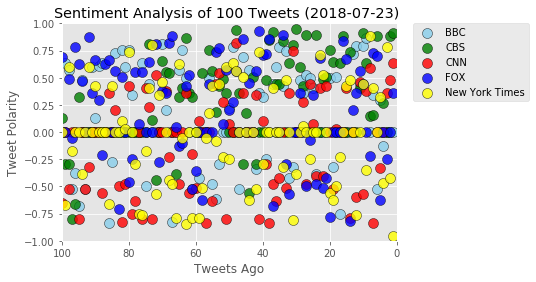

In [13]:
# Create plot
x_vals = range(100,0,-1)
#print(str(len(x_vals)))
y_valbbc= bbc_compound_list
y_valcbs= cbs_compound_list
y_valcnn= cnn_compound_list
y_valfox= fox_compound_list
y_valnyt= nytimes_compound_list
#plt.scatter(x_vals,y_vals, marker="o", linewidth=0.5,alpha=0.8,color="skyblue",label=True,edgecolor="black")
#plt.scatter(x_vals,y_vals, marker="o", linewidth=0.5,alpha=0.8,color="skyblue",label=True,edgecolor="green")
plt.scatter(x_vals,y_valbbc, marker="o", linewidth=0.5,alpha=0.8,color="skyblue",label="BBC",edgecolor="black",
            s=100)
plt.scatter(x_vals,y_valcbs, marker="o", linewidth=0.5,alpha=0.8,color="green",label="CBS",edgecolor="black",s=100)
plt.scatter(x_vals,y_valcnn, marker="o", linewidth=0.5,alpha=0.8,color="red",label="CNN",edgecolor="black",s=100)
plt.scatter(x_vals,y_valfox, marker="o", linewidth=0.5,alpha=0.8,color="blue",label="FOX",edgecolor="black",s=100)
plt.scatter(x_vals,y_valnyt, marker="o", linewidth=0.5,alpha=0.8,color="yellow",label="New York Times",edgecolor="black",
            s=100)

## Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d")
#plt.legend(loc='upper right',markerscale=0.7, scatterpoints=1,)
#plt.tight_layout()
#plt.figure(figsize=(4,3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(f"Sentiment Analysis of 100 Tweets ({now}) ")
plt.xlim([100,0]) 
plt.ylim(-1,+1)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
#save figure into the images folder.
plt.savefig("Images/twitter_sentiment_scatter.png",bbox_inches="tight")

plt.show()

In [14]:
print(target_list)
print(avglist)

['BBC', 'CBS', 'CNN', 'FOX', 'nytimes']
[0.138332, 0.256843, -0.09330999999999999, 0.19605299999999992, -0.023185]


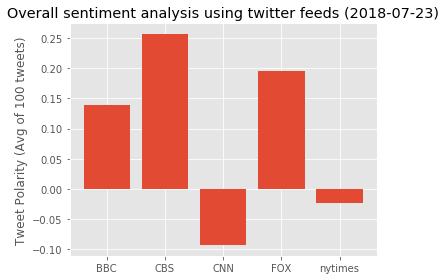

In [15]:
plt.bar(target_list,avglist)
plt.ylabel("Tweet Polarity (Avg of 100 tweets)" )
plt.title(f"Overall sentiment analysis using twitter feeds ({now})")
#plt.title(f"Sentiment Analysis of 100 Tweets ({now}) ")
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.tight_layout()
plt.savefig("Images/twitter_analysis_bar.png",bbox_inches="tight")

#x1=
#y1=
#txt1=f"avglist[0], %2f"
#plt.text(0.15,0.13,avglist[0])
plt.show()

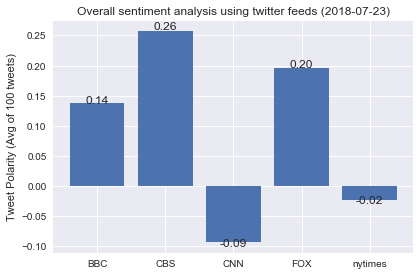

In [27]:
ax = plt.bar(target_list,avglist)
sns.set(font_scale=1)
plt.title("2016 - Income vs Obesity %")
for p in ax.patches:
    width = p.get_width()
    #print(str(width))
    height = p.get_height()
    #print(str(height))
    plt.text(p.get_x()+0.5*p.get_width(),p.get_y()+1.03*p.get_height(),
             '{:1.2f}'.format(height),
             ha='center', va='center')
plt.ylabel("Tweet Polarity (Avg of 100 tweets)" )
plt.title(f"Overall sentiment analysis using twitter feeds ({now})")
#plt.title(f"Sentiment Analysis of 100 Tweets ({now}) ")
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.tight_layout()
plt.savefig("Images/twitter_analysis_bar.png",bbox_inches="tight")
plt.show()